In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.ndimage.filters import uniform_filter1d

In [2]:
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, \
BatchNormalization, Input, concatenate, Activation
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [3]:
INPUT_LIB = 'E:/8th sem/nasa kaggle dataset/'
raw_data = np.loadtxt(INPUT_LIB + 'exoTrain.csv', skiprows=1, delimiter=',')
x_train = raw_data[:, 1:]
y_train = raw_data[:, 0, np.newaxis] - 1.
raw_data = np.loadtxt(INPUT_LIB + 'exoTest.csv', skiprows=1, delimiter=',')
x_test = raw_data[:, 1:]
y_test = raw_data[:, 0, np.newaxis] - 1.
#del raw_data

In [4]:
x_train

array([[ 93.85,  83.81,  20.1 , ...,  61.42,   5.08, -39.54],
       [-38.88, -33.83, -58.54, ...,   6.46,  16.  ,  19.93],
       [532.64, 535.92, 513.73, ..., -28.91, -70.02, -96.67],
       ...,
       [273.39, 278.  , 261.73, ...,  88.42,  79.07,  79.43],
       [  3.82,   2.09,  -3.29, ..., -14.55,  -6.41,  -2.55],
       [323.28, 306.36, 293.16, ..., -16.72, -14.09,  27.82]])

In [5]:
import pandas as pd
x_temp= pd.DataFrame(x_train)

In [6]:
x_temp

,0,1,2,3,4,5,6,7,8,9,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [7]:
y_temp = pd.DataFrame(y_train)

In [8]:
y_temp

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
5082,0.0
5083,0.0
5084,0.0
5085,0.0


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

[]

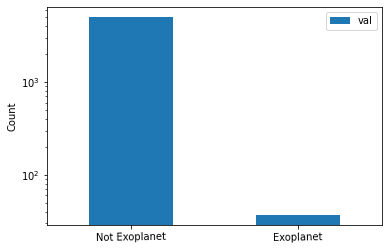

In [10]:
p=0
n=0
for i in y_train:
    if i==1:
        p=p+1
    elif i==0:
        n=n+1
sample = pd.DataFrame({'lab':['Not Exoplanet', 'Exoplanet'], 'val':[n, p]})
ax = sample.plot.bar(x='lab', y='val', rot=1)
ax.set_yscale('log')
ax.set_xlabel('')
ax.set_ylabel('Count')
ax.plot()

[]

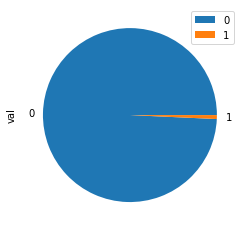

In [11]:
ax = sample.plot.pie(x=['Not Exoplanet','Exoplanet'], y='val')
ax.plot()

In [12]:
print("X_train:",x_train.shape)
print("y_train:",y_train.shape)
print("X_test:",x_test.shape)
print("X_test:",y_test.shape)

X_train: (5087, 3197)
y_train: (5087, 1)
X_test: (570, 3197)
X_test: (570, 1)


In [13]:
# Standardization of the data
x_train = ((x_train - np.mean(x_train, axis=1).reshape(-1,1)) / 
           np.std(x_train, axis=1).reshape(-1,1))
x_test = ((x_test - np.mean(x_test, axis=1).reshape(-1,1)) / 
          np.std(x_test, axis=1).reshape(-1,1))

In [14]:
x_train

array([[ 0.52205598,  0.45958061,  0.06313585, ...,  0.32025558,
        -0.03032828, -0.30798274],
       [-0.52418682, -0.44002245, -0.85184454, ...,  0.23145922,
         0.39045488,  0.45595309],
       [ 1.86086099,  1.87249912,  1.79376438, ..., -0.13163528,
        -0.27750212, -0.37206186],
       ...,
       [ 4.40733518,  4.48246107,  4.21732046, ...,  1.39301064,
         1.24064034,  1.24650701],
       [ 0.27498946,  0.11730004, -0.37308671, ..., -1.39943518,
        -0.65747456, -0.30563574],
       [ 5.16248093,  4.88787124,  4.67363673, ..., -0.35568069,
        -0.31299609,  0.36719848]])

In [15]:
# Moving average
x_train = np.stack([x_train, uniform_filter1d(x_train, axis=1, size=200)], axis=2)
x_test = np.stack([x_test, uniform_filter1d(x_test, axis=1, size=200)], axis=2)

In [16]:
x_train
print(x_train.shape)

(5087, 3197, 2)


In [17]:
# To create randomness due to lack of True Positive Exoplanet cases
def batch_generator(x_train, y_train, batch_size=32):
    half_batch = batch_size // 2
    x_batch = np.empty((batch_size, x_train.shape[1], x_train.shape[2]), dtype='float32')
    y_batch = np.empty((batch_size, y_train.shape[1]), dtype='float32')
    
    yes_idx = np.where(y_train[:,0] == 1.)[0]
    non_idx = np.where(y_train[:,0] == 0.)[0]
    
    while True:
        np.random.shuffle(yes_idx)
        np.random.shuffle(non_idx)
    
        x_batch[:half_batch] = x_train[yes_idx[:half_batch]]
        x_batch[half_batch:] = x_train[non_idx[half_batch:batch_size]]
        y_batch[:half_batch] = y_train[yes_idx[:half_batch]]
        y_batch[half_batch:] = y_train[non_idx[half_batch:batch_size]]
        
        
        for i in range(batch_size):
            sz = np.random.randint(x_batch.shape[1])
            x_batch[i] = np.roll(x_batch[i], sz, axis = 0)
     
        yield x_batch, y_batch

In [18]:
model = Sequential()
model.add(Conv1D(filters=8, kernel_size=11, activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=16, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(BatchNormalization())
model.add(Conv1D(filters=64, kernel_size=11, activation='relu'))
model.add(MaxPool1D(strides=4))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer=Adam(), loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit_generator(batch_generator(x_train, y_train, 32), 
                           validation_data=(x_test, y_test), 
                           verbose=2, epochs=20,
                           steps_per_epoch=x_train.shape[1]//32)

Epoch 1/20
 - 12s - loss: 0.6092 - accuracy: 0.6660 - val_loss: 0.5377 - val_accuracy: 0.8421
Epoch 2/20
 - 10s - loss: 0.4608 - accuracy: 0.7850 - val_loss: 0.3298 - val_accuracy: 0.8579
Epoch 3/20
 - 11s - loss: 0.3529 - accuracy: 0.8463 - val_loss: 0.2476 - val_accuracy: 0.8737
Epoch 4/20
 - 12s - loss: 0.2123 - accuracy: 0.9107 - val_loss: 0.1249 - val_accuracy: 0.9526
Epoch 5/20
 - 11s - loss: 0.1268 - accuracy: 0.9517 - val_loss: 0.1477 - val_accuracy: 0.9526
Epoch 6/20
 - 11s - loss: 0.1353 - accuracy: 0.9533 - val_loss: 0.0897 - val_accuracy: 0.9789
Epoch 7/20
 - 11s - loss: 0.0883 - accuracy: 0.9694 - val_loss: 0.0883 - val_accuracy: 0.9860
Epoch 8/20
 - 11s - loss: 0.0779 - accuracy: 0.9773 - val_loss: 0.0477 - val_accuracy: 0.9860
Epoch 9/20
 - 12s - loss: 0.0977 - accuracy: 0.9672 - val_loss: 0.0582 - val_accuracy: 0.9912
Epoch 10/20
 - 17s - loss: 0.0548 - accuracy: 0.9823 - val_loss: 0.0814 - val_accuracy: 0.9825
Epoch 11/20
 - 14s - loss: 0.0597 - accuracy: 0.9785 - val_

In [123]:
#saving in pickle format and testing on x-test set:
import pickle
filename = "exoplanet_model.pkl"
outfile = open(filename,'wb')

pickle.dump(model,outfile)
outfile.close()


In [47]:
#save the model:
saved_model = pickle.dumps(model)

#load the pickle:
load_pickle = pickle.loads(saved_model)

#predicting on loaded model:
predicted_model = load_pickle.predict(x_test)

In [89]:
predicted_model[6][0]

1.1043192e-09

In [96]:
if predicted_model[6][0]<0.001:
    print('yes')
else:
    print('no')

yes


In [97]:
pred = []
for i in range(len(predicted_model)):
    if predicted_model[i][0]<0.001:
        pred.append(0)
    elif predicted_model[i][0]>0.001:
        pred.append(1)
        

In [118]:
sum=0
c=0
for i,j in zip(pred,y_test):
    if i==j:
        sum=sum+1
    elif i!=j:
        print('pred=',i)
        print('y-test=',j)
        c=c+1
print('sum: ',sum,'count',c)

pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
pred= 1
y-test= [0.]
sum:  552 count 18


In [115]:
pred.index(0)

5

In [113]:
pred.index(1)

0

In [105]:
y_test.shape

(570, 1)

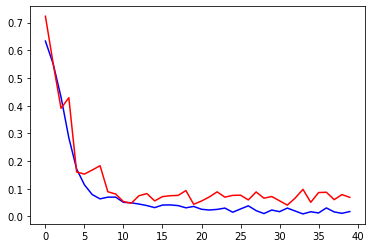

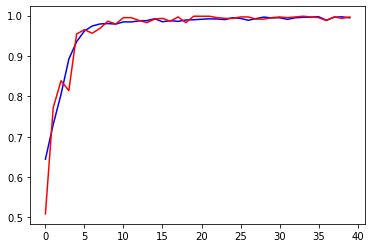

In [20]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['accuracy'], color='b')
plt.plot(hist.history['val_accuracy'], color='r')
plt.show()

In [21]:
non_idx = np.where(y_test[:,0] == 0.)[0]
yes_idx = np.where(y_test[:,0] == 1.)[0]
y_hat = model.predict(x_test)[:,0]

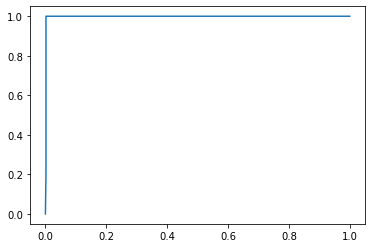

ROC area under curve is 1.00


In [22]:
y_true = (y_test[:, 0] + 0.5).astype("int")
fpr, tpr, thresholds = roc_curve(y_true, y_hat)
plt.plot(fpr, tpr)
plt.show()
print("ROC area under curve is {0:.2f}".format(roc_auc_score(y_true, y_hat)))